In [ ]:
# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis 
(EDA), model training and model evaluation/comparison. 
## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic 
EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with 
to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [28]:
import pandas as pd
order = pd.read_csv(".\data\Orders.csv")

In [34]:
order.shape

(51290, 24)

In [6]:
order.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [5]:
order.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [ ]:
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [59]:
import re
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs

In [60]:
#pd.to_numeric(
print (order['Sales'].head())
print (order['Profit'].head())

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: object
0      62.15
1    -288.77
2     919.97
3     -96.54
4     311.52
Name: Profit, dtype: object


In [61]:
type(order['Profit'].head())

pandas.core.series.Series

In [74]:
#pd.to_numeric()
order['Profit'] = pd.to_numeric(order['Profit'])
order['Sales'] = pd.to_numeric(order['Sales'])

In [75]:
print (order['Profit'].head())
print (order['Sales'].head())

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64
0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64


In [ ]:
### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. 
Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. 
    If an order contains more than one product, there will be multiple observations of the same order.

In [79]:
#new column for 
#train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
order["Order.Date"] = pd.to_datetime(order["Order.Date"])
pd.to_datetime(order["Order.Date"]).head()

0   2014-11-11
1   2014-02-05
2   2014-10-17
3   2014-01-28
4   2014-11-05
Name: Order.Date, dtype: datetime64[ns]

In [83]:
order["Month"] = order["Order.Date"].dt.month
#https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not/33757291

In [84]:
order.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11


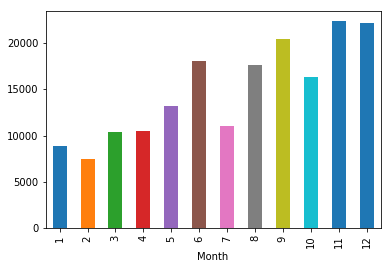

In [113]:
%matplotlib inline
data = order.groupby('Month')['Quantity'].sum() #pandas.core.series.Series
data #= data.to_frame()
#data = pd.concat([order['Month'], order['Quantity']], axis=1) #pandas.core.frame.DataFrame
data.plot(kind = 'bar')#.scatter(x='Month', y='Quantity', ylim=(0,20));
#type(data)

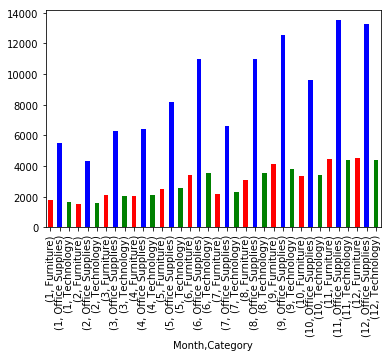

In [231]:
data = order.groupby(['Month', 'Category'])['Quantity'].sum() #pandas.core.series.Series
data #= data.to_frame()
#data = pd.concat([order['Month'], order['Quantity']], axis=1) #pandas.core.frame.DataFrame
#colors = {'Technology': 'r', 'Furniture': 'b', 'Office Supplies': 'g'}
#data.plot(kind = 'bar', figsize= (12,8), color=[colors[i] for i in data['Category']])#.scatter(x='Month', y='Quantity', ylim=(0,20));
#type(data)
colors = {0: 'r', 1: 'b', 2: 'g'}
data.plot(kind='bar', color=[colors[i] for i in data.index.labels[1]])
#data.index
#MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Furniture', 'Office Supplies', 'Technology']],
#           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 
#           10, 11, 11, 11], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 
#           1, 2, 0, 1, 2]],
#           names=['Month', 'Category'])
#data.index.labels[1]

In [ ]:
### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?
	2. How many customer returned more than once? more than 5 times?
	3. Which regions are more likely to return orders?
	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [ ]:
#question 1
#merge
returnsa1 = merge(ordera, returnsa, by.x = "Order.ID", by.y = "Order ID") 
#grab needed col
ret = returnsa1[,c("Order.Date", "Profit", "Customer.ID", "Region.x", "Category", "Sub.Category")]
#revise date and set profit to numeric
ret[,c("Profit"):= list(as.numeric(gsub("[$,]","",Profit)))] #remove $ and ,
ret[,c("Order.Date") := list(as.Date(Order.Date, "%m/%d/%y"))] # use as.Date to set order date 
ret[,c("Order.Year") := list(year(Order.Date))] # order year 
ret[,c("LostProfit") := list(ifelse(Profit < 0, as.numeric(Profit), 0))]  #lost profit 
ret2= ret %>% group_by(Order.Year) %>% summarize(LostProfit = sum(LostProfit))  
#ret[,c("Lost Profit") := NULL] #clean

In [15]:
import pandas as pd
order = pd.read_csv(".\data\Orders.csv")
returns = pd.read_csv(".\data\Returns.csv")
import re
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Profit'] = pd.to_numeric(order['Profit'])
order['Sales'] = pd.to_numeric(order['Sales'])
order["Order.Date"] = pd.to_datetime(order["Order.Date"])

In [4]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [ ]:
	1. How much profit did we lose due to returns each year?

In [25]:
order["Year"] = order["Order.Date"].dt.year
merged = order.merge(returns, how='inner', left_on= "Order.ID", right_on="Order ID")
merged.head()
#merged[merged['Returned'] == "Yes"]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1356.03,3,0.0,311.85,458.97,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,882.15,5,0.0,114.60,203.92,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,148.32,3,0.0,68.22,25.48,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [27]:
selected_merged = merged[['Year','Customer.ID', 'Profit', 'Region_x', 'Category', 'Sub.Category']]
selected_merged.head()
#ret = returnsa1[,c("Order.Date", "Profit", "Customer.ID", "Region.x", "Category", "Sub.Category")]

,Year,Customer.ID,Profit,Region_x,Category,Sub.Category
0,2012,PB-19210127,720.36,Eastern Asia,Furniture,Tables
1,2012,PB-19210127,153.75,Eastern Asia,Furniture,Bookcases
2,2012,PB-19210127,311.85,Eastern Asia,Furniture,Tables
3,2012,PB-19210127,114.60,Eastern Asia,Furniture,Chairs
4,2012,PB-19210127,68.22,Eastern Asia,Technology,Machines


In [29]:
lost_profit = selected_merged.groupby(['Year'])['Profit'].sum()
lost_profit

Year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [ ]:
	2. How many customer returned more than once? more than 5 times?

In [37]:
customer_returns = selected_merged.groupby(['Customer.ID'])['Customer.ID'].count()
customer_returns.sort_values(ascending = False).head()

Customer.ID
PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
Name: Customer.ID, dtype: int64

In [67]:
customer_returns[customer_returns.values > 1].count() #more than one return

547

In [68]:
customer_returns[customer_returns.values > 5].count() #more than five returns

46

In [ ]:
	3. Which regions are more likely to return orders?

In [73]:
regions = selected_merged.groupby(['Region_x'])['Region_x'].count()
regions.sort_values(ascending=False)

Region_x
Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Region_x, dtype: int64

In [ ]:
	4. Which categories (sub-categories) of products are more likely to be returned?

In [74]:
regions = selected_merged.groupby(['Category'])['Category'].count()
regions.sort_values(ascending=False)

Category
Office Supplies    1348
Technology          445
Furniture           427
Name: Category, dtype: int64

In [79]:
regions = selected_merged.groupby(['Category','Sub.Category'])['Sub.Category'].count()
regions.sort_values(ascending=False)

Category         Sub.Category
Office Supplies  Binders         269
                 Art             217
                 Storage         212
                 Paper           150
Furniture        Chairs          147
Technology       Phones          145
                 Accessories     138
Office Supplies  Labels          137
Furniture        Furnishings     135
                 Bookcases       104
Office Supplies  Supplies        103
                 Fasteners       102
                 Envelopes        99
Technology       Copiers          99
                 Machines         63
Office Supplies  Appliances       59
Furniture        Tables           41
Name: Sub.Category, dtype: int64

In [ ]:
## Part II: Machine Learning and Business Use Case
Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict 
which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and 
your managers requirements.
### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders IDs are contained in the dataset returns
#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date
#### Step 3:
- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [ ]:
Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict 
which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and 
your managers requirements.
### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders IDs are contained in the dataset returns

In [1]:
import pandas as pd
order = pd.read_csv(".\data\Orders.csv")
returns = pd.read_csv(".\data\Returns.csv")
import re
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Profit'] = pd.to_numeric(order['Profit'])
order['Sales'] = pd.to_numeric(order['Sales'])
order["Order.Date"] = pd.to_datetime(order["Order.Date"])
order["Ship.Date"] = pd.to_datetime(order["Ship.Date"])

In [34]:
#order["Year"] = order["Order.Date"].dt.year
merged = order.merge(returns, how='outer', left_on= "Order.ID", right_on="Order ID")
merged.head()
#merged[merged['Returned'] == "Yes"]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,2014,NaN,NaN,NaN
1,40099,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,341.96,2,0.0,54.71,25.27,High,2014,NaN,NaN,NaN
2,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2014,NaN,NaN,NaN
3,26339,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,344.68,2,0.1,34.42,65.35,Critical,2014,NaN,NaN,NaN
4,26340,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,133.92,5,0.1,-6.03,41.64,Critical,2014,NaN,NaN,NaN


In [31]:
merged['Returned'].dtypes

dtype('O')

In [69]:
merged['Returned'] = ['No' if ans != 'Yes' else 'Yes' for ans in merged['Returned']] #NAN -> no

In [70]:
#merged[merged['Returned'] == 'Yes'] #!=
#merged['Returned'].dtypes
merged['Returned'] = merged['Returned'].astype('category')
#order
merged['Returned'].head()

0    No
1    No
2    No
3    No
4    No
Name: Returned, dtype: category
Categories (2, object): [No, Yes]

In [71]:
merged['Returned'].dtypes

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [ ]:
#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [38]:
merged["Ship.Date"] = pd.to_datetime(merged["Ship.Date"])
merged["Order.Date"] = pd.to_datetime(merged["Order.Date"])
#merged['Process.Time'] = merged['Ship.Date'] - merged['Order.Date']

In [72]:
merged['Process.Time'] = merged['Ship.Date'] - merged['Order.Date']
merged.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Returned,Order ID,Region_y,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.77,High,2014,No,NaN,NaN,2 days
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,54.71,25.27,High,2014,No,NaN,NaN,2 days
2,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.63,Critical,2014,No,NaN,NaN,2 days
3,26339,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,2,0.1,34.42,65.35,Critical,2014,No,NaN,NaN,2 days
4,26340,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,5,0.1,-6.03,41.64,Critical,2014,No,NaN,NaN,2 days


In [ ]:
#### Step 3:
- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [73]:
merged['Product.ID'].head()

0    TEC-PH-5816
1    FUR-BO-5957
2    FUR-CH-5379
3    TEC-CO-3594
4    OFF-ST-5697
Name: Product.ID, dtype: object

In [67]:
merged[merged['Returned'] == 'Yes'].head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Returned,Order ID,Region_y,Process.Time
62,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.0,720.36,725.57,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia,3 days
63,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,153.75,627.27,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia,3 days
64,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,311.85,458.97,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia,3 days
65,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,114.60,203.92,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia,3 days
66,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,68.22,25.48,Critical,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia,3 days


In [76]:
returned_orders = merged.groupby(['Product.ID', 'Process.Time', 'Returned'])['Product.ID'].count()
#returned_orders['Returned'].filter(lambda x: x == "Yes")
returned_orders.sort_values(ascending=False).head()

Product.ID   Process.Time  Returned
OFF-FA-6129  4 days        No          51
             5 days        No          43
             2 days        No          37
             6 days        No          31
OFF-BI-3737  4 days        No          30
Name: Product.ID, dtype: int64

In [ ]:
### Problem 5: Fitting Models
- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` 
function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold]
(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) 
 #function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so dont spend too much time on grid search. Focus on model 
 evaluation and the business use case of each model.

In [79]:
returned_orders.head()

Product.ID   Process.Time  Returned
FUR-BO-3174  2 days        No          1
             6 days        No          1
FUR-BO-3175  0 days        No          1
             2 days        No          3
             4 days        No          3
Name: Product.ID, dtype: int64

In [ ]:
#up to date 
import pandas as pd
order = pd.read_csv(".\data\Orders.csv")
returns = pd.read_csv(".\data\Returns.csv")
import re
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Profit'] = pd.to_numeric(order['Profit'])
order['Sales'] = pd.to_numeric(order['Sales'])
order["Order.Date"] = pd.to_datetime(order["Order.Date"])
order["Ship.Date"] = pd.to_datetime(order["Ship.Date"])

merged = order.merge(returns, how='outer', left_on= "Order.ID", right_on="Order ID")
merged['Returned'] = ['No' if ans != 'Yes' else 'Yes' for ans in merged['Returned']] #NAN -> no
merged['Returned'] = merged['Returned'].astype('category')

merged['Process.Time'] = merged['Ship.Date'] - merged['Order.Date']

returned_orders = merged.groupby(['Product.ID', 'Process.Time', 'Returned'])['Product.ID'].count()

In [ ]:
### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care 
 the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business 
 problem.

In [ ]:
### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.